In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
df = pd.read_csv('CustomerChurn.csv')
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [12]:
df.TotalCharges[df.TotalCharges == " "]

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [13]:
df.MonthlyCharges[df.TotalCharges == " "]

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [17]:
pd.to_numeric(df.TotalCharges[df.TotalCharges == " "], errors='coerce')

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [23]:
df = df.drop(df.TotalCharges[df.TotalCharges == " "].index, axis=0)

In [30]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [31]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

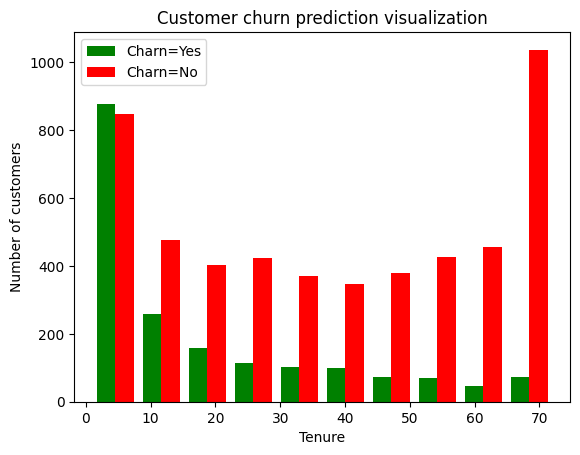

In [32]:
tenure_churn_yes = df[df.Churn=='Yes'].tenure
tenure_churn_no = df[df.Churn=='No'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Customer churn prediction visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Charn=Yes', 'Charn=No'])
plt.legend()

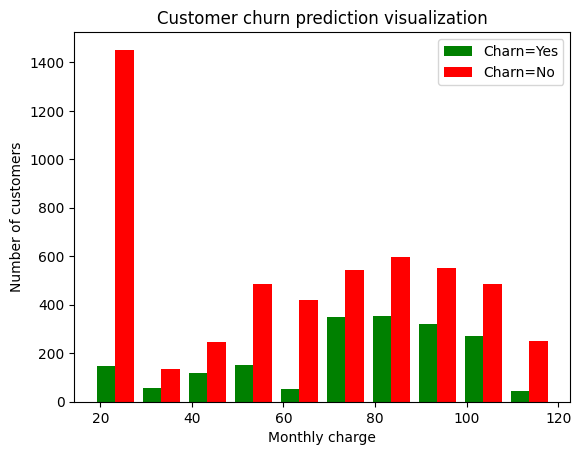

In [33]:
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges
mc_churn_no = df[df.Churn=='No'].MonthlyCharges

plt.xlabel('Monthly charge')
plt.ylabel('Number of customers')
plt.title('Customer churn prediction visualization')

plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Charn=Yes', 'Charn=No'])
plt.legend()

In [53]:
df.drop('customerID',axis='columns',inplace=True)

In [55]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [56]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [60]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [62]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [63]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [64]:
print_unique_col_values(df)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [65]:
df.gender.replace({'Female':1, 'Male':0}, inplace=True)

In [66]:
df.gender.unique()

array([1, 0], dtype=int64)

In [68]:
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [70]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4111,1,0,0,0,22,1,0,0,1,1,...,True,False,False,False,True,False,True,False,False,False
5754,1,0,1,1,22,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
3319,1,0,0,0,2,1,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
1573,0,0,1,1,47,1,0,1,1,1,...,False,True,False,False,True,False,False,False,True,False
2519,0,0,1,0,2,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False


In [71]:
df['Contract_Two year'].dtypes

dtype('bool')

In [80]:
cols_to_astype = ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
            'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
df[cols_to_astype] = df[cols_to_astype].astype(int)

In [81]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5512,1,0,1,1,9,1,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
5024,0,0,1,0,72,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3205,1,0,1,1,72,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
3078,1,1,0,0,2,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1498,0,1,0,0,15,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [82]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [83]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [92]:
df.iloc[:,:-10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0
7039,1,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0
7040,1,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0
7041,0,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1


In [93]:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [94]:
X = df.drop('Churn', axis='columns')
y = df['Churn']

In [96]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [103]:
X_train.shape[0] / df.shape[0]

0.7999146757679181

In [104]:
X_test.shape[0] / df.shape[0]

0.20008532423208192

In [105]:
X_train.shape[0] / df.shape[0] + X_test.shape[0] / df.shape[0]

1.0

In [109]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs_2/adam', histogram_freq=1)

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                540       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8041
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.8011
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8066
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8055
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8059
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.8062
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8060
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8053
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8075
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4051 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8220
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8206
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8203
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8212
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8213
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8231
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8224
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8208
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8226
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 

In [115]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7839


[0.4739121198654175, 0.7839374542236328]

In [114]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2660,0,0,0,1,0.169014,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
744,1,0,0,0,0.056338,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5579,1,0,1,1,0.971831,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
64,1,0,0,0,0.112676,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3287,0,0,1,1,0.253521,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,0,0,0,0,0.154930,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4396,0,1,0,0,0.000000,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4081,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1297,1,0,0,0,0.056338,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [121]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.36991352],
       [0.5764272 ],
       [0.00186628],
       [0.84293133],
       [0.5969865 ]], dtype=float32)

In [137]:
y_pred = [round(x[0]) for x in yp]

In [118]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [138]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       999
           1       0.63      0.61      0.62       408

    accuracy                           0.78      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.78      0.78      0.78      1407



In [140]:
!pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     -----                                 41.0/293.3 kB 960.0 kB/s eta 0:00:01
     --------------------------             204.8/293.3 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 2.6 MB/s eta 0:00:00


Text(95.72222222222221, 0.5, 'Truth')

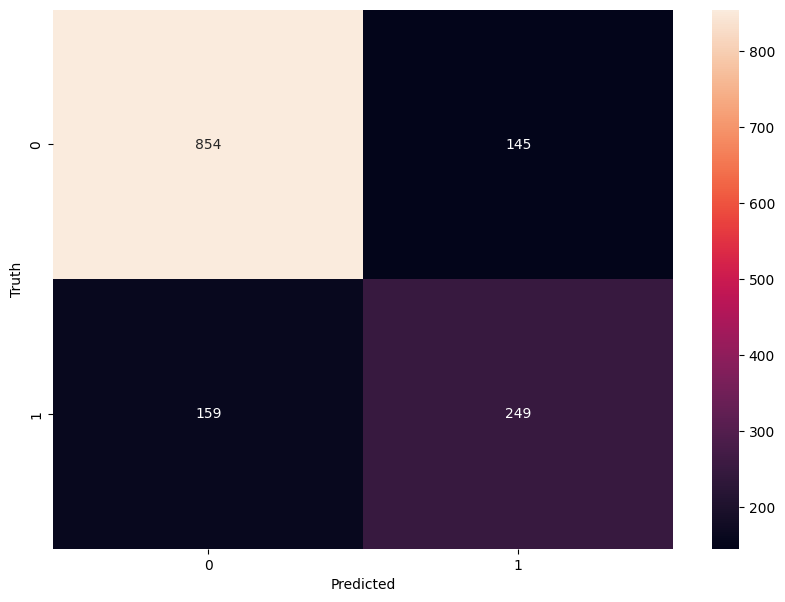

In [141]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [145]:
accuracy = (854+249)/(854+249+145+159)
accuracy

0.7839374555792467

In [146]:
presicion = (249)/(249+145)
presicion

0.631979695431472

In [147]:
recall = (249)/(249+159)
recall

0.6102941176470589

In [148]:
f1_score = (2*recall*presicion)/(recall+presicion)
f1_score

0.6209476309226932

In [150]:
precision_2 = (854)/(854+159)
precision_2

0.843040473840079

In [151]:
recall_2 = (854)/(854+145)
recall_2

0.8548548548548549

In [153]:
f1_score_2 = (2*recall_2*precision_2)/(recall_2+precision_2)
f1_score_2

0.8489065606361829